# Introduction to Machine learning - Jugendforum Informatik
--------

This is just to make the notebook look prettier. It is modifying the HTML code of the notebook so the caption of the figures is centered. 

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.center {
  text-align: center;
}
</style>
""")

## Introduction
-----
### Science

To appreciate how machine learning is different to what you have done in science until now, let us start with a simple physics problem: a basketball player, who is 2m tall, is standing on the floor 10m away from the basket. If he throws the ball at 40 degrees angle with the horizontal, at what initial speed must he throw so that it goes through the hoob without striking the backboard? The basket height is 3.05m.






<img src="./images/physicsc.jpg" alt="Physics! It works!" width="700"/>

<div class="center"> 
    source: <a href="https://www.physicsforums.com/threads/basketball-projectile-motion-problem.252905/">
        physicsforum.com
    </a>
</div>


To solve such a problem, we use some equations, put in the numbers and get the answer. 

In summary, we do this:    **model -> put data into the model -> answer.**

### Machine learning

Machine learning flips the first two steps. We want to learn our model automatically from the data that we have avaiable.

A usual machine learning application can be seen as follows: **data -> learn the model that best answers our question -> answers.**

Referring back to our example above: We use the data of previous throws and learn the model from this data in order to predict the initial speed for future attempts. 

#### Classification
For simplicity we will focus on a particular subclass of problems: supervised classification. Let us find out what this means. We are given some data $x$

<img src="./images/celebA.png" alt="CelebA" width="1000"/>

<div class="center"> 
    source: <a href="http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">
        CelebA website
    </a>
</div>

and we want to classify them. In the example we want to identify male/female, brown/blonde, glasses/no glasses, etc.

#### Supervised
A problem is supervised when we have access to a dataset that contains both the data $x$ and a label $y$ that says in which class $x$ is. For example

<img src="./images/celebA_labels.jpg" alt="CelebA with labels" width="1000"/>

<div class="center"> 
    source: <a href="http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">
        CelebA website
    </a>
</div>

in this case the possible classes are specified and we can train our algorithm on a pair (sample, label).

Summarizing this tutorial, we will learn how to take a dataset composed of (sample, label) and train a machine learning algorithm such that it learns how to predict a label $y$  to a new input $x$.

## Jupyter notebooks stuff
---

This tutorial is run inside a jupyter notebook. A jupyter notebook is a wonderful tecnology that allows us to mix python code and text. They are quite easy to use but can be hard to master completely. Here you can find a nice tutorial that explains much more than we need: https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook

For this tutorial all you need to know is the following:
* A kernel is just a program that interprets the python code and produce the outputs
* You can execute a cell by pressing shift + enter
* Tab is your friend, it activates autocompletion
* If you need to reset all the outputs and start again use Kernel -> Restart Kernel (you will not lose your data)
* All the variables are shared among all the cells. So if you do 

In [2]:
a = 3

In [3]:
print(a)

3


In [4]:
a = 7

if now you execute the print again it will print 7. Usually it is not a problem but it can be a source of bugs.

### This tutorial
------

In this tutorial we will explore some basic machine learning and we will explain the standard machine learning pipeline, which consists of the following steps: 

1. Load the data
* Choose the algorithm
* Train the model
* Estimate the quality of the output
* Choose the parameters of the model

This is an interractive tutorial. We will focus on one specific algorithm called "k-nearest neighbors" (knn for short) and we will use it to explore the five steps above. After we introduce a concept, we will let you experiment with some tasks and learn by doing. We will use different datasets, some for the examples and some for the exercises.

## Machine learning
-----



### 1: Loading and exploring the data
---

Before we can apply an algorithm we need to be able to load the data, which we want to work on, in a format that our computer can understand.
Luckily Python comes equipped with a series of libraries designed for data analysis and exploration that make our lifes much easier. You can have a partial overview of what is avaiable here https://numfocus.org/sponsored-projects?_sft_project_category=python-interface

We will use:

* Numpy: The standard library for efficient computations (http://www.numpy.org/)
* Matplotlib: The standard library for data visualizzation (https://matplotlib.org/)

Many more are avaiable:

* Pandas: The standard library for data exploration (https://pandas.pydata.org/)
* Bokeh: Another great data visualization library (https://bokeh.pydata.org/en/latest/)
* Altair: My favourite data visualization library (https://altair-viz.github.io/)
    
Here, we will cover the basics but if you want to know more, a great place to start is https://jakevdp.github.io/PythonDataScienceHandbook/

### README: Numpy
---

Numpy is one of the core libraries for data science/machine learning in python. A large number of other libraries build onto it. It provides an object called numpy array that works more or less like a python list. With two huge differences, python lists are dynamic and can contain objects with different types

In [5]:
l = []
l.append(2)
l.append("Hola")
print(l)
l.append(3.14152)
print(l)

[2, 'Hola']
[2, 'Hola', 3.14152]


meanwhile numpy arrays require you to specify how many elements they will contain

In [6]:
import numpy as np # include numpy in our code so we can use it
arr = np.empty(10) # creates an array with ten elements

And cannot contain elements from different types, remove the comment and try to run

In [7]:
#arr[3] = "Hola"

the reason why we use numpy is because it is way more efficient than normal python

In [8]:
n = 10**6
python = range(n)
numpy = np.arange(n)

In [9]:
%timeit sum(python)

13.3 ms ± 808 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit np.sum(numpy)

643 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Loading the data

The first step in any application that uses data is to load the data into the computer. This can be a quite complicated task but thankfully, the dataset, which we will use, is standardized and available in formats which are easy to use.

In [12]:
import numpy as np
with np.load('./data/mnist.npz') as data:
    x_mnist_train, y_mnist_train = data['x_train'].reshape((-1, 784)), data['y_train']
    x_mnist_test, y_mnist_test = data['x_test'].reshape((-1, 784)), data['y_test']

### Interpreting the data

Loading the data is (usually) the easy part. Once we have it, we need to understand what the data mean. For now we will focus on x_mnist_train and y_mnist_train since x_mnist_test and y_mnist_test contain similar elements.

First we check how many elements we have and how they are organised. Numpy makes it easy for us (f'string' is a nice way to print values in python: https://realpython.com/python-f-strings/)

In [13]:
print(f'Shape of x_mnist_train = {x_mnist_train.shape}')
print(f'Shape of y_mnist_train = {y_mnist_train.shape}')

Shape of x_mnist_train = (60000, 784)
Shape of y_mnist_train = (60000,)


This means that in x_mnist_train we have 60k elements and each element is composed of 784=28x28 numbers. As we expect y_mnist_train has the same number of elements as x_mnist_train, but in y_mnist_train each element contains only one number.

Let us access the first element in both x_mnist_train and y_mnist_train.

In [14]:
x, y = x_mnist_train[0], y_mnist_train[0]

and take a look inside:

In [15]:
print(f'x = {x}')
print(f'y = {y}')

x = [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   

##### Not very helpful right? 

An important lesson with data is: If you do not know how the data is encoded and what the data means, then it could be anything.

Luckily, we know where the data came from and we know how to interpret it. Every x encodes a 28x28 image and y encodes its associated number. 

So let us reshape our image into a 28x28 image and see what it looks like!

In [16]:
x = x.reshape((28,28))

In [17]:
np.set_printoptions(linewidth=200)
print(f'x = \n {x}')
np.set_printoptions(linewidth=75)

x = 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241 

Hmm.. Not much better. 

Maybe you can already see the number, this element is supposed to be. However, we didn't use the values yet. We need color!

In order to plot it nicer, we will use matplotlib. Matplotlib is an extremely powerful library that allows you to plot more or less anything. Unfortunately, it does not have the most intuitive interface and the learning curve is a bit steep. You can find a nice tutorial here https://www.youtube.com/watch?v=rARMKS8jE9g.



%matplotlib inline and %config InlineBackend.figure_format = 'svg' are magic commands that makes plots look much nicer. No kidding, they are really called magic commands: https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib.

Now, let's import all this as plt. 

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

Now we will use the function imshow. Imshow takes an nxn image and plots it on the screen. Additionally, we use a colormap that takes our values and turns them into anything grey between black and white. 

##### Let's see!

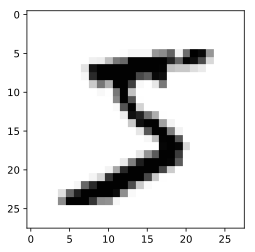

In [19]:
plt.imshow(x, cmap='Greys') #cmap=Greys plots black and white

Now it is immediately clear what our data represents and we can actually see the number 5.

So remember, if possible, plot your datapoints!  Plot them in a format that you can understand and visually inspect them. This will help you get a better idea of what is in your dataset and what you can do with it.

##### Good to know: 

The data for one datapoint are also called the **features**. In this case an element has 784 features. The class this elements belongs to is called a **label**. In this case, it is the number 5. 


### Exercices  1)

a) Load the Quick!Draw! dataset

### 1.1: Our datasets

Knn has a nice visual interpretation. MNIST and other datasets tends to be too big to really appreciate. So it is worth creating a much smaller dataset and play around with it a little bit. Sklearn has a wonderful function that allows us to do exaclty that. We can be very specific in how the data set is supposed to look. 

In [20]:
from sklearn.datasets import make_classification
x_fake, y_fake = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=43, class_sep=0.6)
x_fake_train, y_fake_train = x_fake[:100], y_fake[:100]
x_fake_test, y_fake_test = x_fake[100:], y_fake[100:]

#### Plotting

Let us see, what dataset we created here. 

In [23]:
from utils.plotting import plot_dataset, plot_classifier

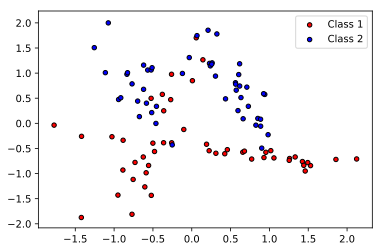

In [24]:
plot_dataset(x_fake_train, y_fake_train)

Now we want to predict if a new point $x$ is in class 1 or class 2. 

### 2: Choose your algorithm
---



Before we start we need to introduce the algorithm we want to use: the knn algorithm.

The name of this algorithm comes from the intuition behind it. Similar objects usually are clustered together, they are in the same ''Neighborhood'', so if we take a look at a new element we can guess its class by a majority vote from the elements around it.

We can make this intuition more precise like this. Given a new point x, in order to decide its label we will do the following:
* Take the k closest neighbors of x.
* Count how many times each label occurs in this neighborhood.
* The label that appears most often wins, say the label is 4. 
* Predict the label 4 for the data point x. 

In a graphical way we can represent it like this: we have two classes, red triangle and blue square, and we want to classify a new point: the green circle

<img src="./images/KnnClassification.svg" alt="KNN" width="500"/>

<div class="center"> 
    source: <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">
        Wikipedia
    </a>
</div>


Python has a large number of machine learning algorthms already avaiable. They are implemented in the scikit-learn package(https://scikit-learn.org/stable/). You can use it like this

In [25]:
import sklearn

In the case of knn all we need to do is the following

In [26]:
from sklearn.neighbors import KNeighborsClassifier

### 3: Training
---

The process that allows an algorithm to improve its prediction is usually called training. During the training phase we want to teach our algorithm to make good predictions. Broadly speaking there are two classes of learning:

   * Static learning: The algorithm takes all the $x$ and by using some clever math it learns how to associate $x$ to a label $y$ and to make as less error as possible.
   * Dynamic learning: The algorithm keeps iterating over the $x$s and every time it makes a mistake it tries to improve itself, so that it will make less errors next time.
   
Knn uses static learning. Meanwhile neural networks (this afternoon class) are an example of dynamic learning. The details of the process are different for every algorithm and unfortunately they require more mathematics than we can explain here. But sklearn helps us, for example suppose that we want to train a 1-nn classifier. This is what we need to do.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1) # Create the kNN model for one nearest neighbor
model.fit(x_fake_train, y_fake_train) # trains the classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Using a function, that we created, we can plot what the classifer learned.

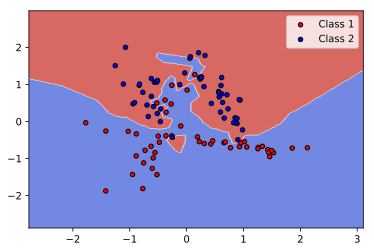

In [28]:
plot_classifier(x_fake_train, y_fake_train, model)

#### Exercises
a) Train and plot a 5-nn using the same data as before.

b) Train and plot a 10-nn usign the same data as before.

### 4: Evaluating the output
---

Now that we have trained our classifer we would like to know: Is it any good? To decide if a classifier is good or not we will count how many mistakes it makes.
So we take a point $(x, y)$ in our dataset and we ask the algorithm to predict its class $\hat{y}$. If we have that $\hat{y} = y$, then the algorithm was correct, otherwise it made a mistake. Let us do it in practice.

In [29]:
x, y = x_fake_train[0], y_fake_test[0]
print(f'The class of x is {y}')

The class of x is 1


Let us see if our algorithm agrees:

In [30]:
model = KNeighborsClassifier(n_neighbors=1) # Create the kNN model for one nearest neighbor
model.fit(x_fake_train, y_fake_train) # trains the classifier
model.predict(x.reshape(1, -1)) # the reshape is necessary because we are using only one datapoint

array([1])

So the algorthm did not make a mistake. 

Obvously it is not practical to have to check point by point if the algorithm agrees. Sklearn provides a nice function to check all the points simultaneously. It outputs the percentage of correct answers divided by 100. So 0 means all wrong and 1 all right.

In [31]:
print(f'Train accuracy: {model.score(x_fake_train, y_fake_train)}')

Train accuracy: 1.0


Let us see how well it does on the test set.

In [32]:
print(f'Test accuracy: {model.score(x_fake_test, y_fake_test)}')

Test accuracy: 0.8325


As we see on new data the accuracy of our algorithm drops quite a bit.

#### Exercise
Train a 5-nn and determine the train and test accuracy. Do you see anything strange? Can you explain why this happens?

In [33]:
model = KNeighborsClassifier(n_neighbors=5) # Create the kNN model for one nearest neighbor
model.fit(x_fake_train, y_fake_train) # trains the classifier
print(f'Train accuracy: {model.score(x_fake_train, y_fake_train)}')
print(f'Test accuracy: {model.score(x_fake_test, y_fake_test)}')

Train accuracy: 0.91
Test accuracy: 0.8825


### 3.1: Overfiting 
---

Something weird happen in the exercise. The train accuracy is lower than in a 1-NN but the test accuracy is higher. 5 it is not the only situation where this happens

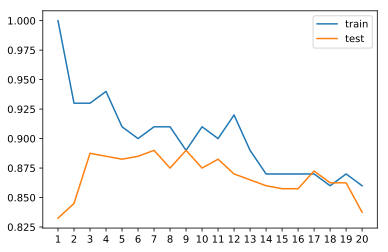

In [34]:
ks = np.arange(1,21)
train_accuracies = []
test_accuracies = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k) 
    model.fit(x_fake_train, y_fake_train) 
    train_accuracies.append(model.score(x_fake_train, y_fake_train))
    test_accuracies.append(model.score(x_fake_test, y_fake_test))
    
plt.plot(ks, train_accuracies, label="train")
plt.plot(ks, test_accuracies, label="test")
plt.xticks(np.arange(min(ks), max(ks)+1, 1.0))
plt.legend()

So it can happen that better train accuracy leads to worse test accuracy. This is known as **overfitting**, the algoritms learns the training set too well and it fails to work well on new unseen data. The ability of an algoritm to work on unsean data is called **generalization**. How can we fix this problem?

### 4: Choosing the parameters
---

To avoid overfitting we need to be careful in how we choose the parameters of our algorthm. Knn is a simple algorithm but we need to make at least one choice before we can use it. We need to choose k. As we saw before, different k produce different train and test accuracy. Now we need to find a way to choose the best k.

### Cross validation

In general we have access to only a training dataset but we would like to be able to pick the set of parameters that generalizes the most. But be aware, we cannot use the test set to do so! The solution to this problem is the so called **cross validation**. We split the training dataset in two parts: 80% will be used for training and 20% will simulate a new test dataset, called **validation dataset**. We then train our algorithm on the new (smaller) training dataset and evaluate its performance on the validation dataset. Hopefully, the behavior on the validation dataset will simulate what happens on the test dataset. 

Visually we are doing this

<img src="./images/CV.png" alt="Cross validation" width="500"/>

<div class="center"> 
    source: <a href="https://www.datarobot.com/wiki/cross-validation/">
        datarobot.com
    </a>
</div>



Doing all this can be quite complicated but sklearn helps out again. First, we need to say which parameters we want to test. In this case k (called n_neighbors in sklearn) and which range of numbers do we want to test, in this case between 0 and 20.

In [35]:
parameters = {'n_neighbors': np.arange(1, 21)}

Then we can use sklearn to test all the parameters and we will just pick the best one.

In [36]:
from sklearn.model_selection import GridSearchCV

First, we instantiate any kNN classifier without telling it the number of nearest neighbors yet. 

In [37]:
cls = KNeighborsClassifier()

Then we tell sklearn to use kNN and try out all paramenters. In other cases, when we have more parameters that we need to select, then GridSearch tries all combinations!

In [38]:
search = GridSearchCV(cls, param_grid=parameters)

As before we need to tell sklearn to train on our train data

In [39]:
search.fit(x_fake_train, y_fake_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
print(f'Best k = {search.best_params_}')

Best k = {'n_neighbors': 3}


In [41]:
model = KNeighborsClassifier(n_neighbors=3) # Create the 3-NN
model.fit(x_fake_train, y_fake_train) # trains the classifier
print(f'Train accuracy: {model.score(x_fake_train, y_fake_train)}')
print(f'Test accuracy: {model.score(x_fake_test, y_fake_test)}')

Train accuracy: 0.93
Test accuracy: 0.8875


In [42]:
print(f'Training accuracy = {search.score(x_fake_train, y_fake_train)}')
print(f'Test accuracy = {search.score(x_fake_test, y_fake_test)}')

Training accuracy = 0.93
Test accuracy = 0.8875


In [43]:
best_model = search.best_estimator_
print(f'Train accuracy: {best_model.score(x_fake_train, y_fake_train)}')
print(f'Test accuracy: {best_model.score(x_fake_test, y_fake_test)}')

Train accuracy: 0.93
Test accuracy: 0.8875


### Going further
---

#### Different distances

By default knn uses the standard distance between two points to determine how far away they are. For example $(0,0)$ is $2$ away from $(2,2)$. But we can use another type of distance, the so called Manhattan or taxicab distance. Intuitevely it measures the distance if you cannot move diagonally.

<img src="./images/Manhattan_distance.svg" alt="Manhattan distance" width="350"/>

<div class="center"> 
    source: <a href="https://en.wikipedia.org/wiki/Taxicab_geometry">
        Wikipedia
    </a>
</div>

You can find more info https://en.wikipedia.org/wiki/Taxicab_geometry.

We can create a knn that uses that distance in the following way:

In [44]:
cls = KNeighborsClassifier(p=1)

Find out which number of neighbors is best for this distance via CV.

In [45]:
parameters = {'n_neighbors': np.arange(1, 21)}
search = GridSearchCV(cls, param_grid=parameters)
search.fit(x_fake_train, y_fake_train)
print(f'Best k = {search.best_index_}')

Best k = 2


### More classes
---

In [46]:
x_three_classes, y_three_classes = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1, random_state=43, class_sep=0.6)
x_three_classes_train, y_three_classes_train = x_three_classes[:100], y_three_classes[:100]
x_three_classes, y_three_classes = x_three_classes[100:], y_three_classes[100:]

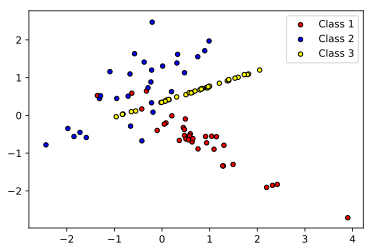

In [47]:
plot_dataset(x_three_classes_train, y_three_classes_train)

In [48]:
model = KNeighborsClassifier(n_neighbors=1) # Create the kNN model for one nearest neighbor
model.fit(x_three_classes_train, y_three_classes_train) # trains the classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Using a function, that we created, we can plot what the classifer learned.

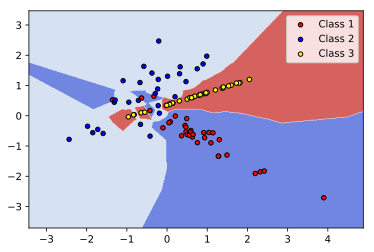

In [49]:
plot_classifier(x_three_classes_train, y_three_classes_train, model)

### Full example

### Decision Tree

In [50]:
from sklearn.datasets import load_iris
iris = load_iris()

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [52]:
import graphviz 
from sklearn.tree import  export_graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True) 
graph = graphviz.Source(dot_data, format='pdf') 
graph.render("iris")


'iris.pdf'

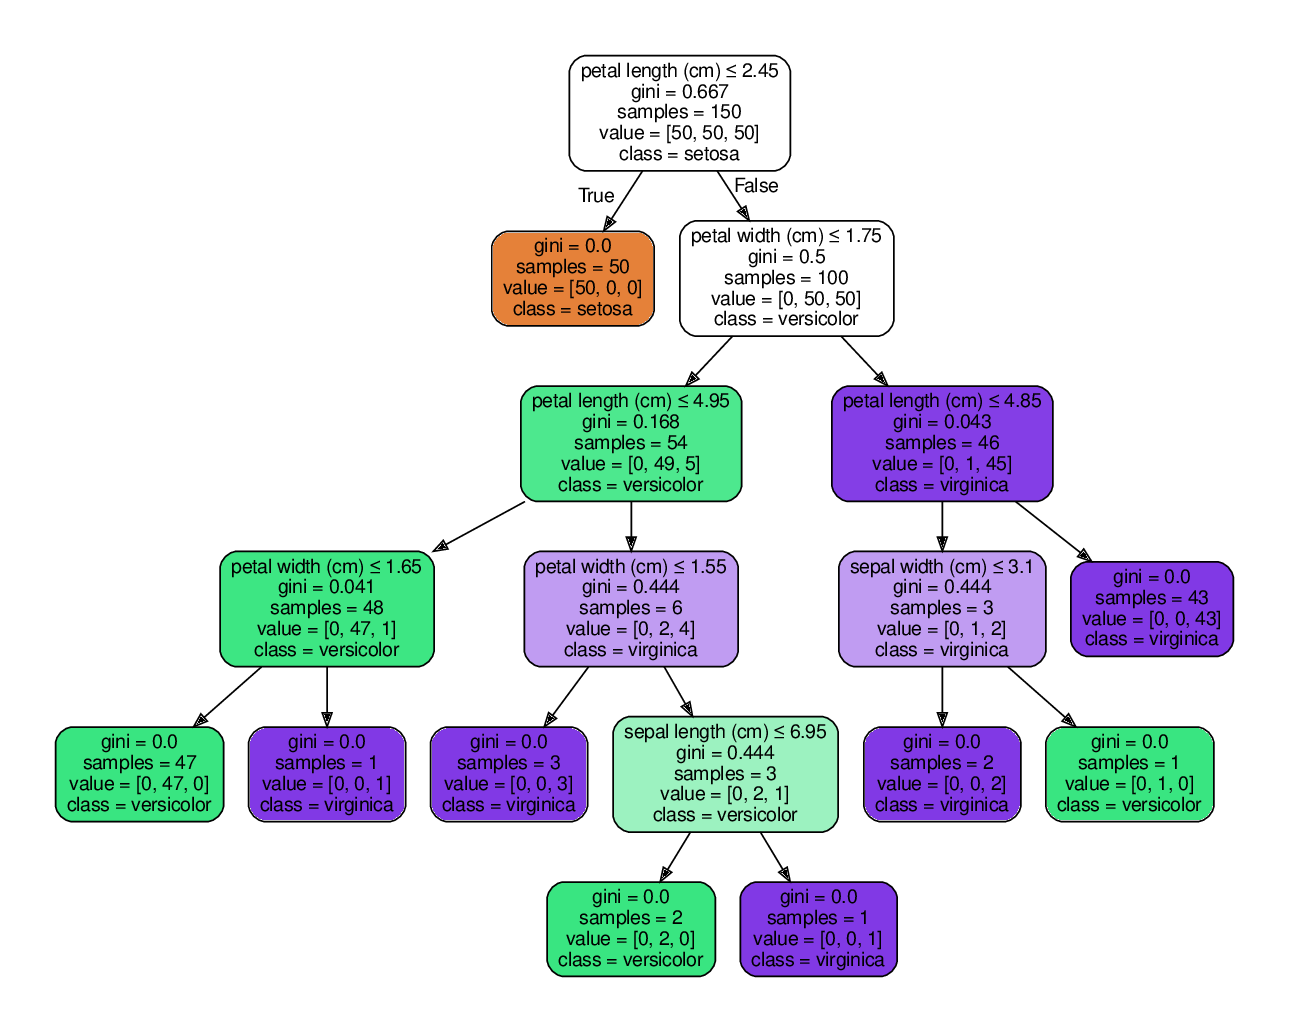

In [53]:
from wand.image import Image as WImage
img = WImage(filename='iris.pdf', resolution=100)
img

### Exercise 

use the wine dataset and to the same

In [54]:
from sklearn.datasets import load_wine
wine = load_wine()

In [55]:
clf = DecisionTreeClassifier()
clf = clf.fit(wine.data, wine.target)

In [56]:
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=wine.feature_names,  
                           class_names=wine.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True) 
graph = graphviz.Source(dot_data, format='pdf') 
graph.render("wine")

'wine.pdf'

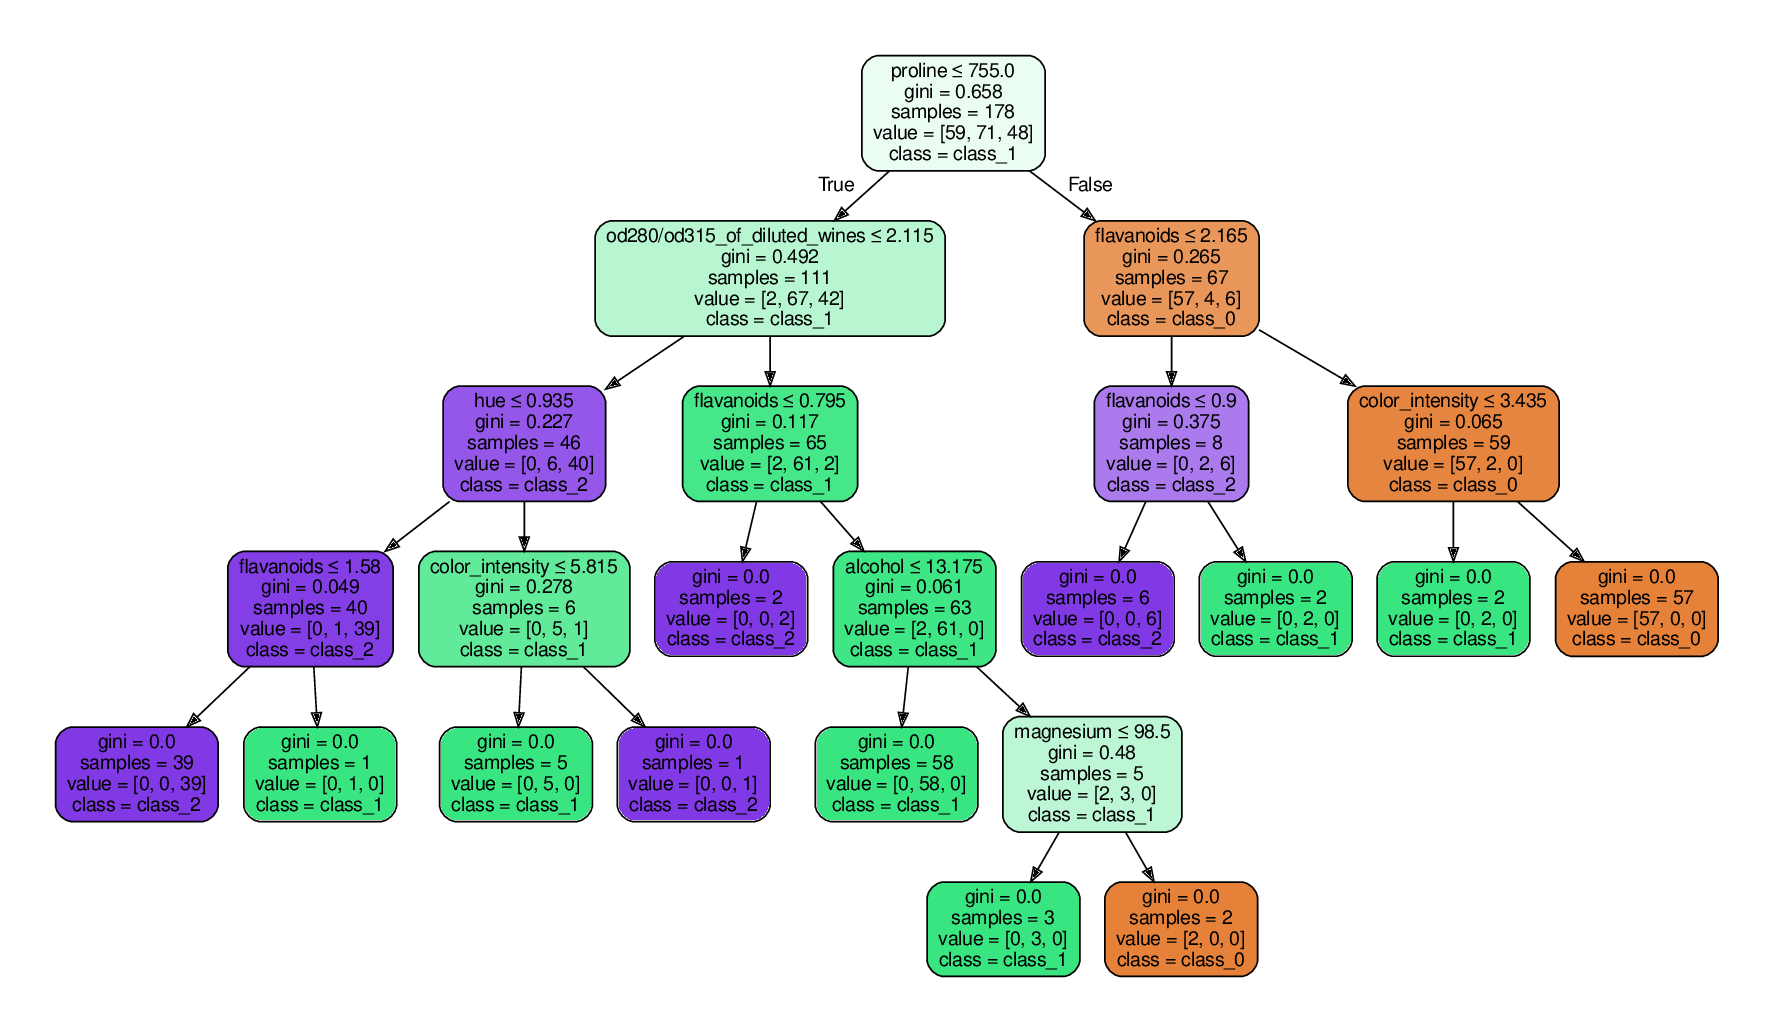

In [57]:
WImage(filename='wine.pdf', resolution=100)

### Show off

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from ShowOff import plot

In [ ]:
plot()

## Going further: Unsupervised Learning
---

### Dimensionality reduction
---

As human being we prefer to see in 1D, 2D or 3D. 1D is often way too simple to tell anything meaningfull but compressing out data and visualizing them in 2D or 3D can help to develop some intuition about how our dataset works and what to expect from it. Clearly, this process is not perfect and it will result in some infomation getting lost, but in general it is worth the effort. Here we will present two: Principal Component Analysis (PCA) and t-SNE.

#### So, how does MNIST look like in 2 dimensions?

### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
reduced_mnist = pca.fit_transform(x_mnist_test)

In [ ]:
pca_one = reduced_mnist[:,0]
pca_two = reduced_mnist[:,1]
label = y_mnist_test

plt.scatter(pca_one, pca_two, c=label, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

#### Can you explain what you see here?

### t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, n_iter = 500)
reduced_mnist = tsne.fit_transform(x_mnist_test)

In [ ]:
pca_one = reduced_mnist[:,0]
pca_two = reduced_mnist[:,1]
label = y_mnist_test

plt.scatter(pca_one, pca_two, c=label, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()